In [47]:
import statistics as s
import scipy.stats as ss
import random

In [2]:
marks = []
for i in range(1,21):
    marks.append(random.randint(50,100))    

In [3]:
marks

[90,
 51,
 80,
 96,
 53,
 88,
 82,
 84,
 91,
 58,
 75,
 100,
 85,
 60,
 57,
 80,
 56,
 78,
 57,
 53]

In [12]:
ages = [40,55,30,43,20,22,28,120,22,25]

### Measures of Central Tendency

In [5]:
s.mean(ages)

33.4

In [6]:
s.median(ages)

29.0

In [9]:
s.mode(ages)

22

### Measures of Dispersion

In [ ]:
s.variance(ages), s.stdev(ages), max(ages) - min(ages)

In [10]:
ss.skew(marks)

-0.06671797074337313

In [13]:
ss.skew(ages)

2.052465739801142

In [14]:
ss.skew([10,20,30,40,50])

0.0

In [16]:
ss.kurtosis([10,20,30,40,250])

0.18958953004164192

### Draw plots

In [19]:
import pandas as pd

In [26]:
sm = pd.Series(marks)

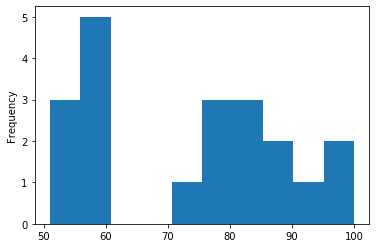

In [21]:
sm.plot(kind='hist')

In [22]:
sa = pd.Series(ages)

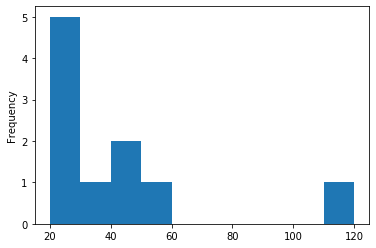

In [23]:
sa.plot(kind='hist')

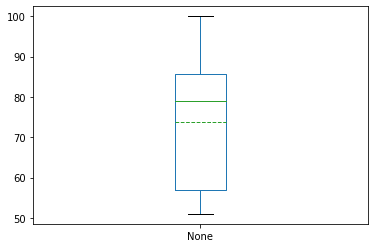

In [30]:
sm.plot(kind='box', showmeans=True, meanline=True)

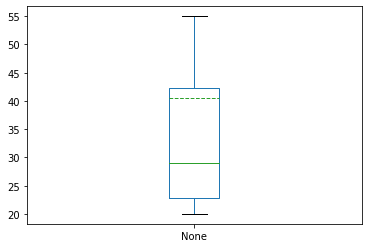

In [33]:
sa.plot(kind='box', showmeans=True, meanline=True, showfliers=False)

In [40]:
df = pd.read_csv("marks.csv")

In [41]:
df.columns

Index(['hours', 'marks'], dtype='object')

In [38]:
df

,hours,marks
0,10,90
1,11,87
2,4,50
3,2,45
4,8,80
5,6,80
6,7,75


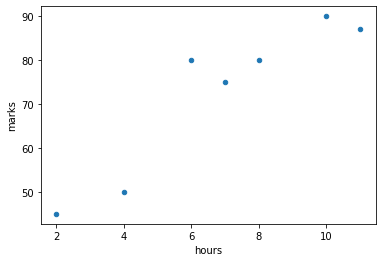

In [43]:
df.plot(kind='scatter',x='hours',y='marks')

### Correlation

In [48]:
ss.pearsonr(df.hours,df.marks)

(0.9281749344729169, 0.0025540254246821555)

In [4]:
df.shape

(35, 2)

In [5]:
df['salary'].head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: salary, dtype: int64

In [6]:
df['salary'].mean()

83945.6

In [7]:
df['salary'].median()

81363.0

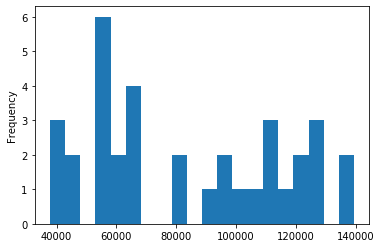

In [8]:
df['salary'].plot.hist(bins=20)

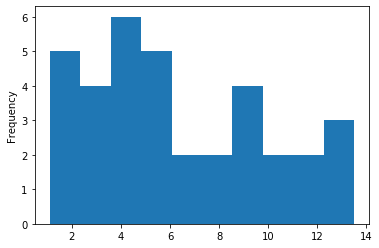

In [9]:
df['exp'].plot.hist()

In [10]:
df['salary'].mode()

0      37731
1      39343
2      39891
3      43525
4      46205
5      54445
6      55794
7      56642
8      56957
9      57081
10     57189
11     60150
12     61111
13     63218
14     64445
15     66029
16     67938
17     81363
18     83088
19     91738
20     93940
21     98273
22    101302
23    105582
24    109431
25    112635
26    113812
27    116969
28    121872
29    122391
30    126756
31    127345
32    128765
33    135675
34    139465
dtype: int64

In [11]:
ages  = [20,22,25,20,34,30,30,20,30,20]

In [12]:
s.mean(ages)

25.1

In [13]:
s.median(ages)

23.5

In [14]:
s.mode(ages)

20

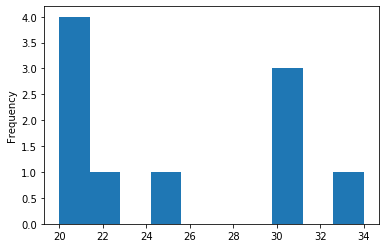

In [15]:
pd.Series(ages).plot.hist()

In [16]:
max(ages) - min(ages)

14

In [17]:
df['salary'].max() - df['salary'].min() 

101734

In [18]:
s.variance(ages)

29.433333333333334

In [19]:
s.stdev(ages)

5.425249610233001

In [20]:
s.stdev( df['exp'])

3.6186096963410934

In [21]:
df['exp'].max() - df['exp'].min() 

12.4

In [22]:
ss.iqr(ages), min(ages), max(ages)

(10.0, 20, 34)

## Outliers in Experience

In [23]:
q1 = df['exp'].quantile(.25)
q3 = df['exp'].quantile(.75)
iqr = q3 - q1

In [24]:
# Lower outliers
for v in df['exp']:
    if v < (q1 - 1.5 * iqr):
        print(v)

In [25]:
# Upper outliers
for v in df['exp']:
    if v > (q3 + 1.5 * iqr):
        print(v)

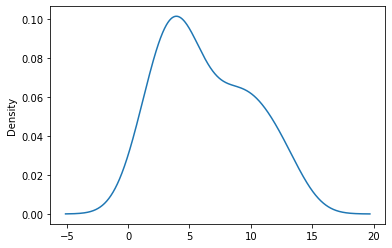

In [26]:
df['exp'].plot.kde()

In [27]:
ss.skew(df['exp'])

0.4019376065648398

### Salaries

In [28]:
salaries = pd.Series([200000,300000, 20000000,300000,250000])
ages = pd.Series([20,25,30,40,24])

In [29]:
q1 = salaries.quantile(.25)
q3 = salaries.quantile(.75)
iqr = q3 - q1

In [30]:
# Upper outliers
for v in salaries:
    if v > (q3 + 1.5 * iqr):
        print(v)

20000000


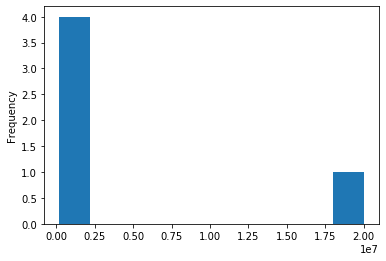

In [31]:
salaries.plot.hist()

In [32]:
ss.skew(salaries)

1.4999172216610963

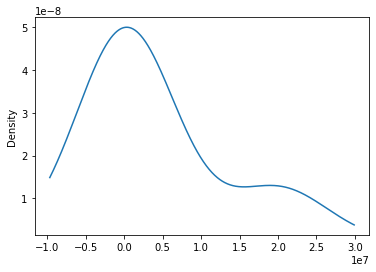

In [33]:
salaries.plot.kde()

In [34]:
ss.kurtosis(salaries)

0.2498898203729234

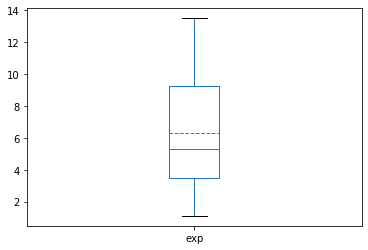

In [35]:
df['exp'].plot.box(showmeans=True, meanline=True)

## Correlaton 

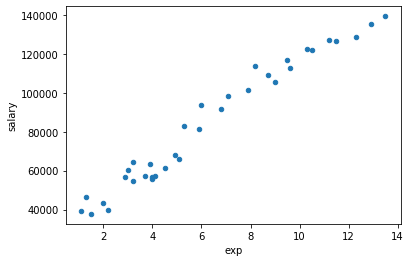

In [36]:
df.plot.scatter(x='exp',y='salary')

In [37]:
ss.pearsonr(df['exp'], df['salary'])

(0.9824272546479684, 1.230990588992688e-25)

In [38]:
salaries = pd.Series([200000,300000,500000,300000,250000])
ages = pd.Series([20,25,30,40,24])

In [39]:
persons =pd.DataFrame( {'salary': salaries, 'age' : ages})

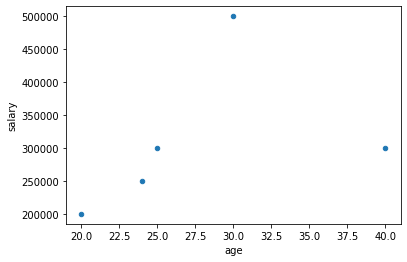

In [40]:
persons.plot.scatter(x = 'age', y = 'salary')

In [41]:
ss.pearsonr(persons['age'], persons['salary'])

(0.40181541321778125, 0.5025140084907671)

## Regression 

In [42]:
det = ss.linregress(df['exp'], df['salary'])

In [43]:
det

LinregressResult(slope=8731.941047062492, intercept=28859.526194531478, rvalue=0.9824272546479683, pvalue=1.2309905889928102e-25, stderr=288.78315746221443)

In [44]:
exp = 4.5
salary = det.intercept + det.slope * exp
print(exp, salary)

4.5 68153.26090631269
